In [8]:
from preprocessing.preprocessing import *
from visualization.general_plots import plot_class_frequencies

# Preprocessing
This notebook shows the steps that were taken in order to process our dataset

## Loading the data
First, the data is loaded via the load_dataset() method.
Then, all data elements without any diabetes information is removed as these are not relevant for our prupose.
We then select the columns we want to use (i.e. all columns relating to physical health) and rename the columns for better readability.

In [9]:
complete_dataset = load_dataset()
complete_dataset = complete_dataset.dropna(subset=['DIABETE3'])
complete_dataset = complete_dataset[relevant_columns]
complete_dataset.columns = readable_column_names
print(complete_dataset.shape)

(441449, 29)


At this stage, there are 441,449 data elements in the dataset.
## Removing unnecessary data entries
Next, all elements with unkown or refused values are removed

In [10]:
complete_dataset = remove_refused_columns(complete_dataset)  # removes ca. 115k columns
complete_dataset = remove_unknown_columns(complete_dataset)  # removes ca. 37k columns
print(complete_dataset.shape)

(288735, 29)


This leaves us with 288,735 data elements.
## Splitting into dataset and target
Now we split the complete dataset into our actual dataset and the target.

In [11]:
target = pd.DataFrame(complete_dataset["Diabetes"])
dataset = complete_dataset.drop(columns="Diabetes")
dataset = dataset.fillna(0)

In [12]:
dataset.head()

,GenHealth,PhysHealth,MentHealth,Healthcare,MedCost,Checkup,HighBP,HighChol,HeartAttack,AngiCoro,...,Height,Weight,BMI,Education,Alcohol,Smoking,FruitCons,VegetCons,PhysActivity,Muscles
0,5.0,15.0,18.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,178.0,12701.0,4.0,2.0,1.0,3.0,2.0,1.0,4.0,2.0
1,3.0,88.0,88.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,...,173.0,7484.0,3.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0
3,5.0,30.0,30.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,170.0,8165.0,3.0,2.0,1.0,4.0,1.0,2.0,4.0,2.0
5,2.0,88.0,88.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,157.0,6577.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0
6,2.0,88.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,168.0,6713.0,2.0,3.0,1.0,4.0,1.0,1.0,1.0,2.0


In [13]:
target.head()

,Diabetes
0,3.0
1,3.0
3,3.0
5,3.0
6,3.0


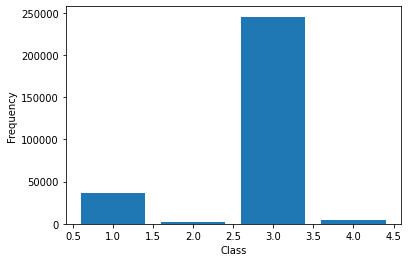

In [14]:
plot_class_frequencies(target)

It is visible that the dataset is very unbalanced, especially with respect to the value diabetes = 3.0 (no).
This is why we will later implement sampling.

## Normalization
Next, we will normalize all numerical values. The columns PhysHealth and MentHealth represent the number of days in the last month were the interviewee did not
feel well physically / mentally. It is a number between 1 and 30, with the value 88 meaning zero days. For this reason, the value 88 will be replaced by 0
before normalization.
We then use a simple MinMaxScalar to normalize the respective columns.

In [16]:
scaler = MinMaxScaler()
dataset["PhysHealth"] = dataset["PhysHealth"].replace(88, 0)
dataset["MentHealth"] = dataset["MentHealth"].replace(88, 0)
dataset[["PhysHealth", "MentHealth", "Height", "Weight"]] = scaler.fit_transform(dataset[["PhysHealth", "MentHealth", "Height", "Weight"]])

In [17]:
dataset.head()

,GenHealth,PhysHealth,MentHealth,Healthcare,MedCost,Checkup,HighBP,HighChol,HeartAttack,AngiCoro,...,Height,Weight,BMI,Education,Alcohol,Smoking,FruitCons,VegetCons,PhysActivity,Muscles
0,5.0,0.5,0.6,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0.777293,0.438192,4.0,2.0,1.0,3.0,2.0,1.0,4.0,2.0
1,3.0,0.0,0.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,...,0.755459,0.258203,3.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0
3,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,0.742358,0.281697,3.0,2.0,1.0,4.0,1.0,2.0,4.0,2.0
5,2.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,0.685590,0.226910,3.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0
6,2.0,0.0,0.1,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0.733624,0.231603,2.0,3.0,1.0,4.0,1.0,1.0,1.0,2.0
